# EvalAe Test

Notebook for testing class `EvalAe` process namely:

1. Initialization with validation data set
2. Load trained autoencoder
3. Extract performance metrics

In [1]:
# Import necessary libraries and path relative to project
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.join(os.path.abspath(''), '../pyno/lib'))
sys.path.append(os.path.join(os.path.abspath(''), '../pyno/modules'))

from autoencoder import Autoencoder
from eval_ae import EvalAe

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
# Parameters
model_file = '/home/ralampay/workspace/pyno/models/backdoor-neural.pth'
test_file = '/home/ralampay/workspace/pyno/data/backdoor-validation.csv'
chunk_size = 1000

params = {
    'model_file': model_file,
    'test_file': test_file,
    'chunk_size': chunk_size
}

In [3]:
cmd = EvalAe(params)
cmd.execute()

Test File: /home/ralampay/workspace/pyno/data/backdoor-validation.csv
Model File: /home/ralampay/workspace/pyno/models/backdoor-neural.pth
╒═════════════════════╤═════════╕
│ Metric              │ Value   │
╞═════════════════════╪═════════╡
│ True Positive       │ 25788   │
├─────────────────────┼─────────┤
│ True Negative       │ 349     │
├─────────────────────┼─────────┤
│ False Positive      │ 316     │
├─────────────────────┼─────────┤
│ False Negative      │ 2111    │
├─────────────────────┼─────────┤
│ True Positive Rate  │ 92.43%  │
├─────────────────────┼─────────┤
│ True Negative Rate  │ 52.48%  │
├─────────────────────┼─────────┤
│ False Positive Rate │ 47.52%  │
├─────────────────────┼─────────┤
│ False Negative Rate │ 7.57%   │
├─────────────────────┼─────────┤
│ PPV                 │ 98.79%  │
├─────────────────────┼─────────┤
│ NPV                 │ 14.19%  │
├─────────────────────┼─────────┤
│ TS                  │ 91.4%   │
├─────────────────────┼─────────┤
│ PT       

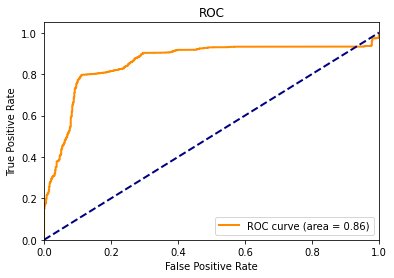

In [4]:
chunksize = 100
data = pd.DataFrame()

for i, chunk in enumerate(pd.read_csv(test_file, header=None, chunksize=chunksize)):
    data = data.append(chunk)

y = []
for r in data.iloc[:,-1:].values:
    y.append(r[0])

y = np.array(y)
scores = cmd.probabilities
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()